In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [23]:
# Load your data
df = pd.read_csv('user_verification_data.csv')
df = df.drop(["country", "device_type","browser"] ,axis=1)
df.head()

,user_id,doc_type,open_page_to_upload_sec,num_upload_attempts,verification_duration_sec,errors_shown,contacted_support,did_first_purchase,verification_success
0,18810,driver_license,177,3,52,True,True,False,True
1,11288,passport,64,1,23,False,False,True,True
2,37399,passport,33,2,107,False,False,True,True
3,44841,ID_card,172,1,65,False,False,False,True
4,23942,driver_license,241,3,24,True,True,False,True


In [27]:
df_encoded = pd.get_dummies(df, columns=['doc_type'])
df_encoded.head(2)

,user_id,open_page_to_upload_sec,num_upload_attempts,verification_duration_sec,errors_shown,contacted_support,did_first_purchase,verification_success,doc_type_ID_card,doc_type_driver_license,doc_type_passport
0,18810,177,3,52,True,True,False,True,False,True,False
1,11288,64,1,23,False,False,True,True,False,False,True


In [28]:
X = df_encoded[["doc_type_ID_card", "doc_type_driver_license", "doc_type_passport", "open_page_to_upload_sec", "num_upload_attempts", "verification_duration_sec","errors_shown", "did_first_purchase", "verification_success"]]
y = df_encoded["contacted_support"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train the model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

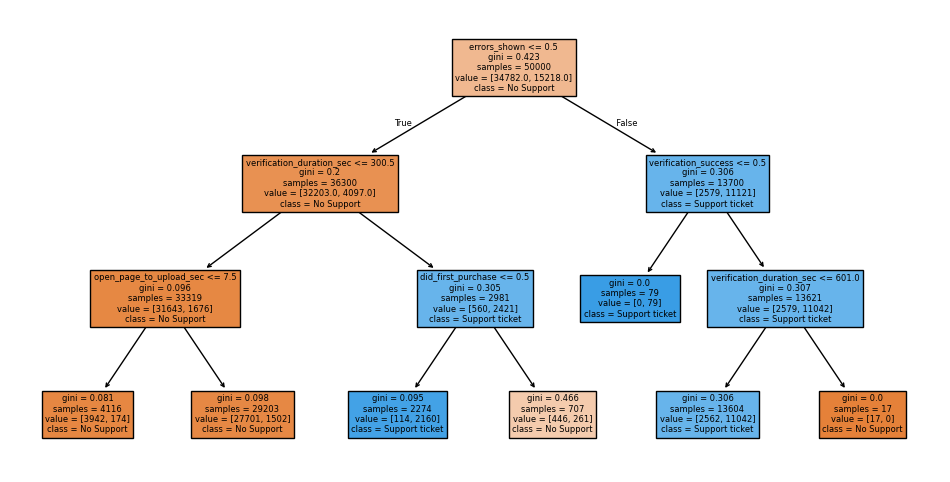

In [31]:
# Plot the tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=X.columns, class_names=['No Support', 'Support ticket'], filled=True)
plt.show()

In [33]:
predictions = model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, predictions)

In [37]:
accuracy

0.9069

In [39]:
target_names = ['No Support', 'Support Ticket']

In [40]:
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

    No Support       0.94      0.92      0.93      6918
Support Ticket       0.83      0.87      0.85      3082

      accuracy                           0.91     10000
     macro avg       0.89      0.90      0.89     10000
  weighted avg       0.91      0.91      0.91     10000

